# Examining tSNE

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import load_and_preprocess as lp
import plot_tools as pt
import seaborn as sns
import xarray as xr
import numpy as np
import cmocean
import joblib
import os

### Set directories and other flags

In [2]:
# select location on disk for plots
ploc = 'plots/plots_WeddellClassOnly_top1000m_K04_forPaperRevisions/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)
    
# if tSNE directory doesn't exist, create it
if not os.path.exists(ploc+'/tSNE/'):
    os.makedirs(ploc+'/tSNE/')
    
# save figures?
saveFigs = True

# load colormaps
colormap = plt.get_cmap('Dark2', 4)
colormap_cividis = plt.get_cmap('cividis', 20)

### Load PCA and labelled profile dataset

In [3]:
pca = joblib.load('models/pca_-65to80lon_-80to-45lat_20to1000depth_6WeddellOnly.pkl', 'r')
pca

PCA(n_components=6)

In [4]:
profiles = xr.open_dataset("weddell_classified_n04.nc")
profiles

<xarray.Dataset>
Dimensions:        (profile: 28397, depth: 21, CLASS: 4, depth_mid: 20)
Coordinates:
  * profile        (profile) int64 13 14 15 16 ... 142282 142301 142320 142330
    lon            (profile) float64 ...
    lat            (profile) float64 ...
  * depth          (depth) float64 20.0 40.0 60.0 80.0 ... 820.0 910.0 1e+03
    time           (profile) datetime64[ns] ...
    year           (profile) int64 ...
    month          (profile) int64 ...
  * CLASS          (CLASS) int64 0 1 2 3
  * depth_mid      (depth_mid) float64 30.0 50.0 70.0 90.0 ... 775.0 865.0 955.0
Data variables: (12/22)
    prof_date      (profile) float64 ...
    prof_YYYYMMDD  (profile) float64 ...
    prof_HHMMSS    (profile) float64 ...
    sig0           (profile, depth) float64 ...
    prof_SA        (profile, depth) float64 ...
    prof_CT        (profile, depth) float64 ...
    ...             ...
    Smin_depth     (profile) float64 ...
    Smax           (profile) float64 ...
    Smax_depth     (profile) float64 ...
    sig0min        (profile) float64 ...
    sig0max        (profile) float64 ...
    imetric        (profile) float64 ...

Since the PCA values for the profiles aren't included in the above Dataset, apply the PCA transformation here 

In [5]:
Xtrans_full = lp.apply_pca(profiles, pca)

load_and_preprocess.apply_pca
load_and_preprocess.apply_scaling
load_and_preprocess.apply_scaling: using depth levels
0.9455362594627065


### Apply tSNE transformations

Here we apply tSNE using different variables to see how the clustering compares.

#### Label

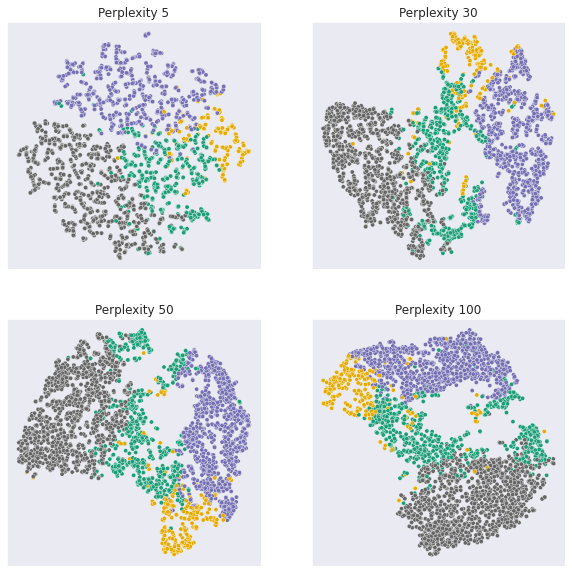

In [6]:

tSNE_data_p1, colors_for_tSNE_p1 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=5, var_to_plot="label")
tSNE_data_p2, colors_for_tSNE_p2 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=30, var_to_plot="label")
tSNE_data_p3, colors_for_tSNE_p3 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=50, var_to_plot="label")
tSNE_data_p4, colors_for_tSNE_p4 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=100, var_to_plot="label")

# plot
sns.set_style("darkgrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# colormap for this
colormap = plt.get_cmap('Dark2', 4)

# size of points
pt = 2.0

# perplexity 5
g1 = sns.scatterplot(x=tSNE_data_p1[0], 
                     y=tSNE_data_p1[1], 
                     hue=colors_for_tSNE_p1, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,0])
g1.set(xticks=[])
g1.set(xticklabels=[])
g1.set(xlabel=None)
g1.set(yticks=[])
g1.set(yticklabels=[])
g1.set(ylabel=None)
g1.set(title='Perplexity 5')

# perplexity 30
g2 = sns.scatterplot(x=tSNE_data_p2[0], 
                     y=tSNE_data_p2[1], 
                     hue=colors_for_tSNE_p2, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,1])
g2.set(xticks=[])
g2.set(xticklabels=[])
g2.set(xlabel=None)
g2.set(yticks=[])
g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.set(title='Perplexity 30')

# perplexity 50
g3 = sns.scatterplot(x=tSNE_data_p3[0], 
                     y=tSNE_data_p3[1], 
                     hue=colors_for_tSNE_p3, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,0])
g3.set(xticks=[])
g3.set(xticklabels=[])
g3.set(xlabel=None)
g3.set(yticks=[])
g3.set(yticklabels=[])
g3.set(ylabel=None)
g3.set(title='Perplexity 50')

# perplexity 100
g4 = sns.scatterplot(x=tSNE_data_p4[0], 
                     y=tSNE_data_p4[1], 
                     hue=colors_for_tSNE_p4, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,1])
g4.set(xticks=[])
g4.set(xticklabels=[])
g4.set(xlabel=None)
g4.set(yticks=[])
g4.set(yticklabels=[])
g4.set(ylabel=None)
g4.set(title='Perplexity 100')

if saveFigs==True:
    plt.savefig(ploc + 'tSNE_fourpanel_byLabel.png', bbox_inches='tight')
    plt.savefig(ploc + 'tSNE_fourpanel_byLabel.pdf', bbox_inches='tight')

#### Month

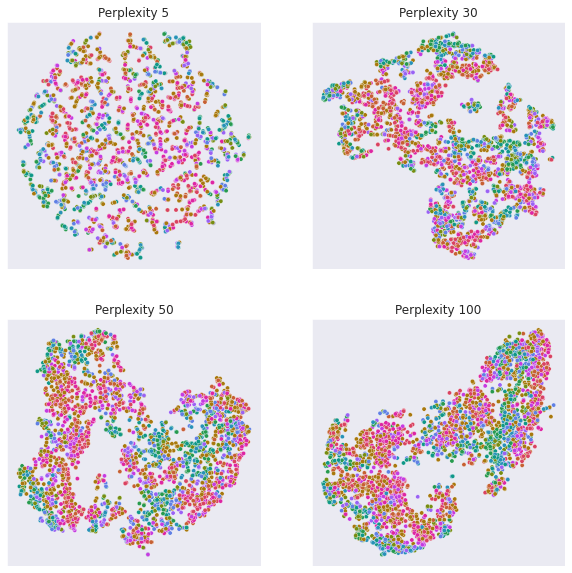

In [7]:
var_to_plot = "month"
tSNE_data_p1, colors_for_tSNE_p1 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=5, var_to_plot=var_to_plot)
tSNE_data_p2, colors_for_tSNE_p2 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=30, var_to_plot=var_to_plot)
tSNE_data_p3, colors_for_tSNE_p3 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=50, var_to_plot=var_to_plot)
tSNE_data_p4, colors_for_tSNE_p4 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=100, var_to_plot=var_to_plot)

# plot
sns.set_style("darkgrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# colormap for this
colormap = cmocean.cm.phase

# size of points
pt = 2.0

# perplexity 5
g1 = sns.scatterplot(x=tSNE_data_p1[0], 
                     y=tSNE_data_p1[1], 
                     hue=colors_for_tSNE_p1, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,0])
g1.set(xticks=[])
g1.set(xticklabels=[])
g1.set(xlabel=None)
g1.set(yticks=[])
g1.set(yticklabels=[])
g1.set(ylabel=None)
g1.set(title='Perplexity 5')

# perplexity 30
g2 = sns.scatterplot(x=tSNE_data_p2[0], 
                     y=tSNE_data_p2[1], 
                     hue=colors_for_tSNE_p2, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,1])
g2.set(xticks=[])
g2.set(xticklabels=[])
g2.set(xlabel=None)
g2.set(yticks=[])
g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.set(title='Perplexity 30')

# perplexity 50
g3 = sns.scatterplot(x=tSNE_data_p3[0], 
                     y=tSNE_data_p3[1], 
                     hue=colors_for_tSNE_p3, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,0])
g3.set(xticks=[])
g3.set(xticklabels=[])
g3.set(xlabel=None)
g3.set(yticks=[])
g3.set(yticklabels=[])
g3.set(ylabel=None)
g3.set(title='Perplexity 50')

# perplexity 100
g4 = sns.scatterplot(x=tSNE_data_p4[0], 
                     y=tSNE_data_p4[1], 
                     hue=colors_for_tSNE_p4, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,1])
g4.set(xticks=[])
g4.set(xticklabels=[])
g4.set(xlabel=None)
g4.set(yticks=[])
g4.set(yticklabels=[])
g4.set(ylabel=None)
g4.set(title='Perplexity 100')

if saveFigs==True:
    plt.savefig(ploc + 'tSNE_fourpanel_byMonth.png', bbox_inches='tight')
    plt.savefig(ploc + 'tSNE_fourpanel_byMonth.pdf', bbox_inches='tight')
    

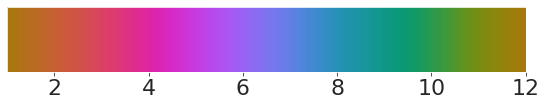

In [8]:
# separate colorbar
a = np.array([[np.min(colors_for_tSNE_p1), np.max(colors_for_tSNE_p1)]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=colormap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax)
cbar.ax.tick_params(labelsize=22)
plt.savefig(ploc + 'tSNE_colorbar_byMonth.pdf', bbox_inches='tight')
plt.savefig(ploc + 'tSNE_colorbar_byMonth.png', bbox_inches='tight')
plt.show()
plt.close()

#### Latitude

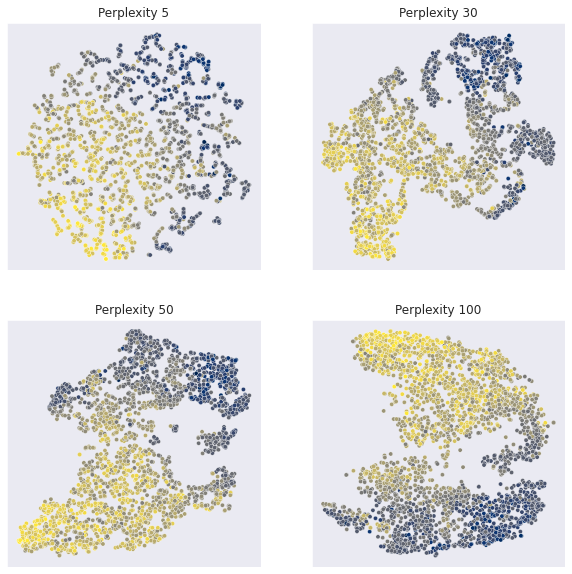

In [9]:
var_to_plot = "lat"
tSNE_data_p1, colors_for_tSNE_p1 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=5, var_to_plot=var_to_plot)
tSNE_data_p2, colors_for_tSNE_p2 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=30, var_to_plot=var_to_plot)
tSNE_data_p3, colors_for_tSNE_p3 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=50, var_to_plot=var_to_plot)
tSNE_data_p4, colors_for_tSNE_p4 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=100, var_to_plot=var_to_plot)

# plot
sns.set_style("darkgrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# colormap for this
colormap = plt.get_cmap('cividis', 20)

# size of points
pt = 2.0

# perplexity 5
g1 = sns.scatterplot(x=tSNE_data_p1[0], 
                     y=tSNE_data_p1[1], 
                     hue=colors_for_tSNE_p1, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,0])
g1.set(xticks=[])
g1.set(xticklabels=[])
g1.set(xlabel=None)
g1.set(yticks=[])
g1.set(yticklabels=[])
g1.set(ylabel=None)
g1.set(title='Perplexity 5')

# perplexity 30
g2 = sns.scatterplot(x=tSNE_data_p2[0], 
                     y=tSNE_data_p2[1], 
                     hue=colors_for_tSNE_p2, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,1])
g2.set(xticks=[])
g2.set(xticklabels=[])
g2.set(xlabel=None)
g2.set(yticks=[])
g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.set(title='Perplexity 30')

# perplexity 50
g3 = sns.scatterplot(x=tSNE_data_p3[0], 
                     y=tSNE_data_p3[1], 
                     hue=colors_for_tSNE_p3, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,0])
g3.set(xticks=[])
g3.set(xticklabels=[])
g3.set(xlabel=None)
g3.set(yticks=[])
g3.set(yticklabels=[])
g3.set(ylabel=None)
g3.set(title='Perplexity 50')

# perplexity 100
g4 = sns.scatterplot(x=tSNE_data_p4[0], 
                     y=tSNE_data_p4[1], 
                     hue=colors_for_tSNE_p4, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,1])
g4.set(xticks=[])
g4.set(xticklabels=[])
g4.set(xlabel=None)
g4.set(yticks=[])
g4.set(yticklabels=[])
g4.set(ylabel=None)
g4.set(title='Perplexity 100')

if saveFigs==True:
    plt.savefig(ploc + 'tSNE_fourpanel_byLat.png', bbox_inches='tight')
    plt.savefig(ploc + 'tSNE_fourpanel_byLat.pdf', bbox_inches='tight')
    

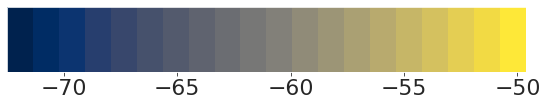

In [10]:
# separate colorbar
a = np.array([[np.min(colors_for_tSNE_p1), np.max(colors_for_tSNE_p1)]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=colormap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax)
cbar.ax.tick_params(labelsize=22)
plt.savefig(ploc + 'tSNE_colorbar_byLat.pdf', bbox_inches='tight')
plt.savefig(ploc + 'tSNE_colorbar_byLat.png', bbox_inches='tight')
plt.show()
plt.close()

#### Longitude

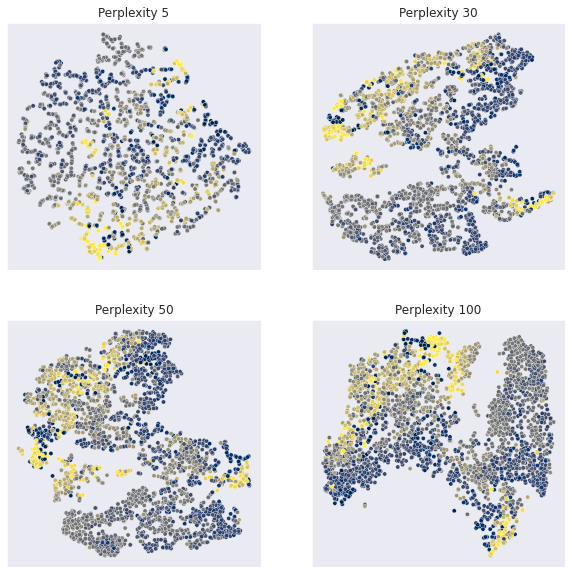

In [11]:
var_to_plot = "lon"
tSNE_data_p1, colors_for_tSNE_p1 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=5, var_to_plot=var_to_plot)
tSNE_data_p2, colors_for_tSNE_p2 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=30, var_to_plot=var_to_plot)
tSNE_data_p3, colors_for_tSNE_p3 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=50, var_to_plot=var_to_plot)
tSNE_data_p4, colors_for_tSNE_p4 = lp.fit_and_apply_tsne(profiles, Xtrans_full, perplexity=100, var_to_plot=var_to_plot)

# plot
sns.set_style("darkgrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# colormap for this
colormap = plt.get_cmap('cividis', 20)

# size of points
pt = 2.0

# perplexity 5
g1 = sns.scatterplot(x=tSNE_data_p1[0], 
                     y=tSNE_data_p1[1], 
                     hue=colors_for_tSNE_p1, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,0])
g1.set(xticks=[])
g1.set(xticklabels=[])
g1.set(xlabel=None)
g1.set(yticks=[])
g1.set(yticklabels=[])
g1.set(ylabel=None)
g1.set(title='Perplexity 5')

# perplexity 30
g2 = sns.scatterplot(x=tSNE_data_p2[0], 
                     y=tSNE_data_p2[1], 
                     hue=colors_for_tSNE_p2, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[0,1])
g2.set(xticks=[])
g2.set(xticklabels=[])
g2.set(xlabel=None)
g2.set(yticks=[])
g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.set(title='Perplexity 30')

# perplexity 50
g3 = sns.scatterplot(x=tSNE_data_p3[0], 
                     y=tSNE_data_p3[1], 
                     hue=colors_for_tSNE_p3, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,0])
g3.set(xticks=[])
g3.set(xticklabels=[])
g3.set(xlabel=None)
g3.set(yticks=[])
g3.set(yticklabels=[])
g3.set(ylabel=None)
g3.set(title='Perplexity 50')

# perplexity 100
g4 = sns.scatterplot(x=tSNE_data_p4[0], 
                     y=tSNE_data_p4[1], 
                     hue=colors_for_tSNE_p4, 
                     palette=colormap,
                     size=pt,
                     legend=False,
                     ax=ax[1,1])
g4.set(xticks=[])
g4.set(xticklabels=[])
g4.set(xlabel=None)
g4.set(yticks=[])
g4.set(yticklabels=[])
g4.set(ylabel=None)
g4.set(title='Perplexity 100')

if saveFigs==True:
    plt.savefig(ploc + 'tSNE_fourpanel_byLon.png', bbox_inches='tight')
    plt.savefig(ploc + 'tSNE_fourpanel_byLon.pdf', bbox_inches='tight')
 

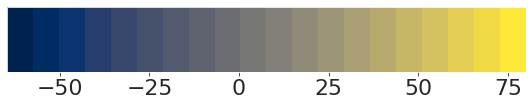

In [12]:
   
# separate colorbar
a = np.array([[np.min(colors_for_tSNE_p1), np.max(colors_for_tSNE_p1)]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=colormap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax)
cbar.ax.tick_params(labelsize=22)
plt.savefig(ploc + 'tSNE_colorbar_byLon.pdf', bbox_inches='tight')
plt.savefig(ploc + 'tSNE_colorbar_byLon.png', bbox_inches='tight')
plt.show()
plt.close()